# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

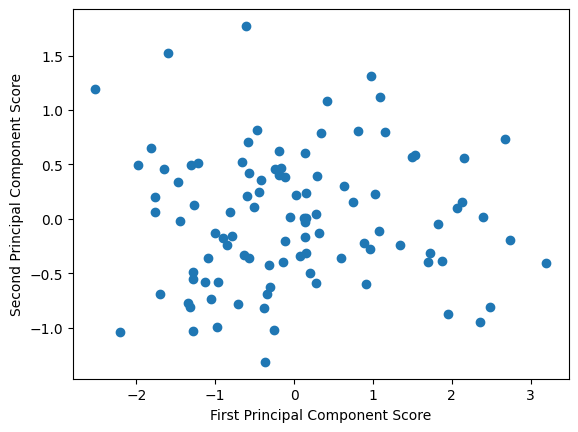

In [2]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

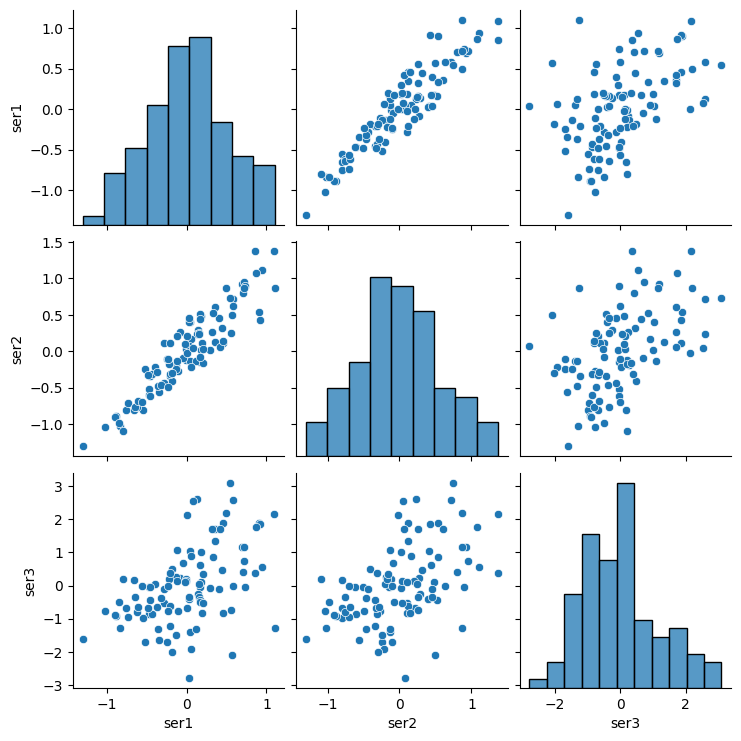

In [3]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
#The outliers in the upper left corner of the graph correspond to data points with high values in the second principal component score (negative on the y-axis) and low values in the first principal component score (negative on the x-axis).
#Serie 1 and serie 2 are highly correlated. The correlations between serie 3 with serie 1 and 2 are pretty low.
#The 3 outliers are likely to deviate significantly from the main cluster in terms of serie 1 and serie 2 (corresponding to the low principle component 1 score). However, given that serie 1 and 2 are highly correlated, we can't make any assumptions on the relative values of series_1 and series_2. 
#The 3 outliers are likely to have close to sample average serie 3 score (corresponding to the high principle conponent 2 score). 

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [4]:
data = pd.read_csv('CVD_data.csv')
data.head()

,DUPERSID,AGEY1X,ADSEX4,PRVEVY1,DIABDXY1_M18,DIABDXY2_M18,DIABAGY1,DIABAGY2,ANGIDXY1,ANGIDXY2,ARTHDXY1,ARTHDXY2,CHDDXY1,CHDDXY2,MIDXY1,MIDXY2,TOTTCHY1,TOTTCHY2
0,2680001101,65.0,NaN,1.0,2.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,0.0
1,2680001102,24.0,NaN,1.0,2.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1185.0,640.0
2,2680006101,62.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,11453.0,17651.0
3,2680010101,67.0,1.0,2.0,2.0,2.0,NaN,NaN,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,10284.0,1362.0
4,2680015101,62.0,NaN,1.0,1.0,1.0,47.0,47.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,4172.0,1302.0


In [5]:
data['TOTTCHY1_rank'] = data['TOTTCHY1'].rank()

In [6]:
hp1 = data[['ANGIDXY1', 'DIABDXY1_M18', 'TOTTCHY1_rank']].pivot_table(index='ANGIDXY1', columns='DIABDXY1_M18', values='TOTTCHY1_rank', aggfunc='mean')

Text(0.5, 1.0, 'Average cost rank by diagnosis of diabetes and angina')

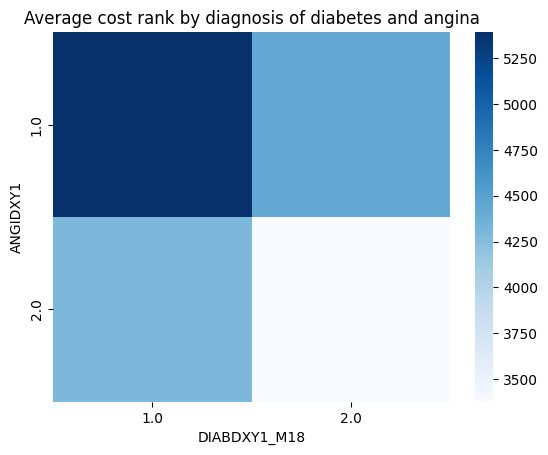

In [7]:
#Heat map
import seaborn as sns
ax = sns.heatmap(hp1, cmap = "Blues")
ax.set_title("Average cost rank by diagnosis of diabetes and angina")

In [7]:
hp2 = data[['ARTHDXY1', 'CHDDXY1', 'TOTTCHY1_rank']].pivot_table(index='ARTHDXY1', columns='CHDDXY1', values='TOTTCHY1_rank', aggfunc='mean')

Text(0.5, 1.0, 'Average cost rank by diagnosis of chronary heart disease and arthritis')

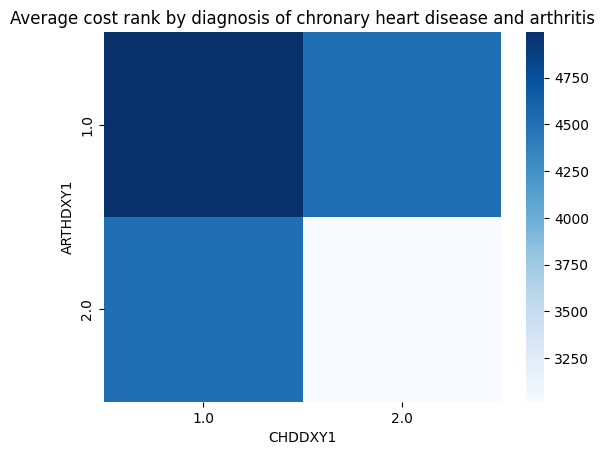

In [8]:
#Heat map
ax = sns.heatmap(hp2, cmap = "Blues")
ax.set_title("Average cost rank by diagnosis of chronary heart disease and arthritis")

In [9]:
hp3 = data[['MIDXY1', 'CHDDXY1', 'TOTTCHY1_rank']].pivot_table(index='MIDXY1', columns='CHDDXY1', values='TOTTCHY1_rank', aggfunc='mean')

Text(0.5, 1.0, 'Average cost rank by diagnosis of chronary heart disease and heart attack')

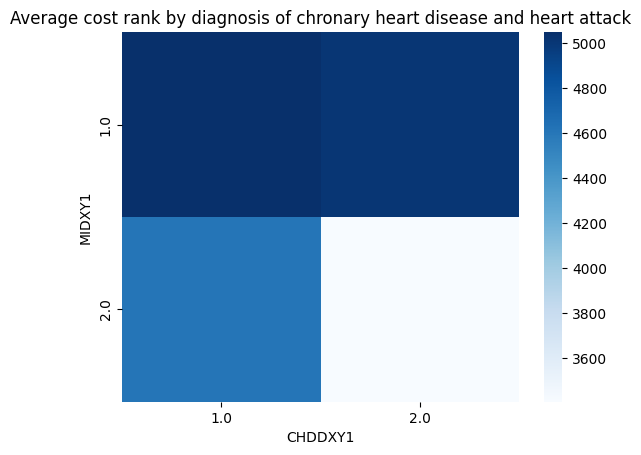

In [10]:
#Heat map
ax = sns.heatmap(hp3, cmap = "Blues")
ax.set_title("Average cost rank by diagnosis of chronary heart disease and heart attack")

In [10]:
hp4 = data[['ANGIDXY1', 'PRVEVY1', 'TOTTCHY1_rank']].pivot_table(index='ANGIDXY1', columns='PRVEVY1', values='TOTTCHY1_rank', aggfunc='mean')

Text(0.5, 1.0, 'Average cost rank by private insurance and diagnosis of angina')

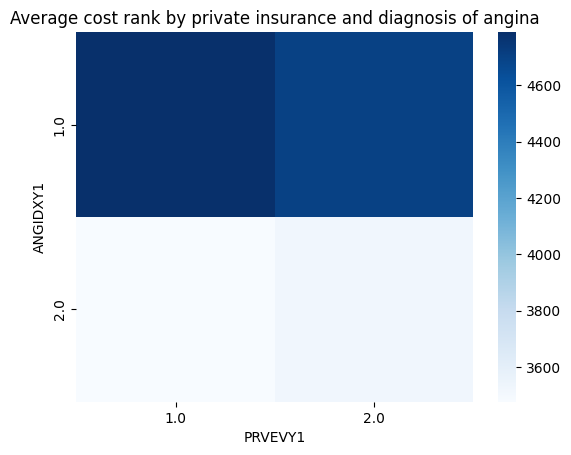

In [11]:
#Heat map
ax = sns.heatmap(hp4, cmap = "Blues")
ax.set_title("Average cost rank by private insurance and diagnosis of angina")

In [ ]:
#Conclusions:
#On average, the cost is the highest among participants who had diagnosis of 2 cardiovascular diseases, followed by those who had 1 diagnosis; participants without any diagnosis had the lowest total health costs.
#When the participant had heart attack, the cost is high no matter whether or not that participant had chronary heart disease.
#Whether or not having health insurance is not related to the total health costs. 

Text(0, 0.5, "Participant's age at diagnosis of diabetes")

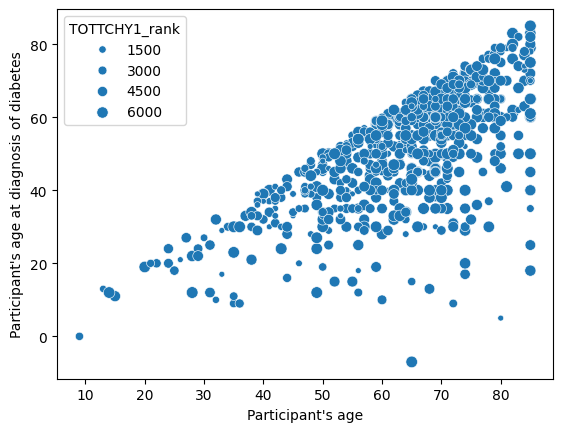

In [13]:
#bubble plot
bp1 = sns.scatterplot(data =data, x = "AGEY1X", y = "DIABAGY1", size = "TOTTCHY1_rank")
bp1.set_xlabel("Participant's age")
bp1.set_ylabel("Participant's age at diagnosis of diabetes")

Text(0, 0.5, "Participant's total healthcare cost")

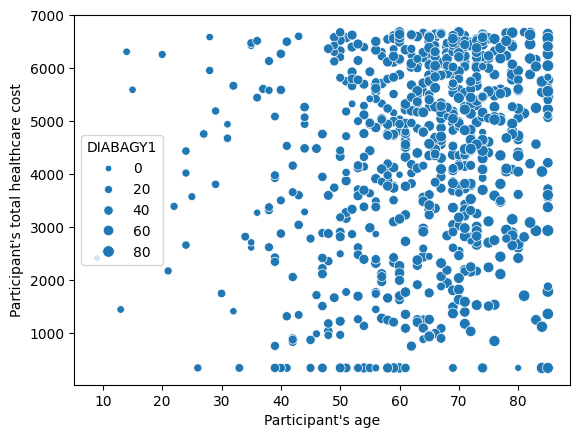

In [14]:
#bubble plot
bp1 = sns.scatterplot(data =data, x = "AGEY1X", y = "TOTTCHY1_rank", size = "DIABAGY1")
bp1.set_xlabel("Participant's age")
bp1.set_ylabel("Participant's total healthcare cost")

Text(0, 0.5, "Participant's total healthcare cost")

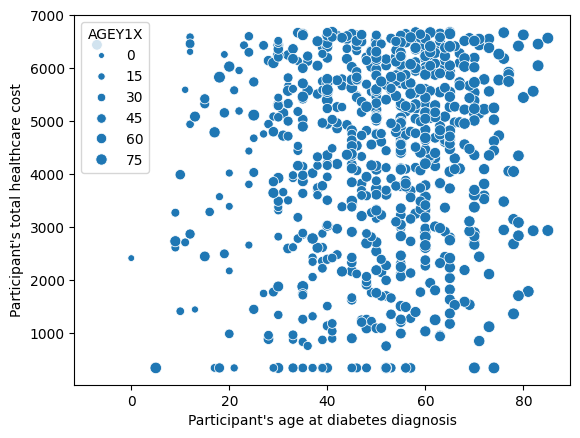

In [15]:
#bubble plot
bp1 = sns.scatterplot(data =data, x = "DIABAGY1", y = "TOTTCHY1_rank", size = "AGEY1X")
bp1.set_xlabel("Participant's age at diabetes diagnosis")
bp1.set_ylabel("Participant's total healthcare cost")

In [ ]:
#Participants' age and age at diabetes diagnosis are positively correlated. 
#The total healthcare cost is slighly higher among those who were older and diagnosed with diabetes at an older age. 

In [16]:
data.head()

,DUPERSID,AGEY1X,ADSEX4,PRVEVY1,DIABDXY1_M18,DIABDXY2_M18,DIABAGY1,DIABAGY2,ANGIDXY1,ANGIDXY2,ARTHDXY1,ARTHDXY2,CHDDXY1,CHDDXY2,MIDXY1,MIDXY2,TOTTCHY1,TOTTCHY2,TOTTCHY1_rank
0,2680001101,65.0,NaN,1.0,2.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,0.0,350.0
1,2680001102,24.0,NaN,1.0,2.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1185.0,640.0,2315.5
2,2680006101,62.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,11453.0,17651.0,5102.0
3,2680010101,67.0,1.0,2.0,2.0,2.0,NaN,NaN,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,10284.0,1362.0,4960.0
4,2680015101,62.0,NaN,1.0,1.0,1.0,47.0,47.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,4172.0,1302.0,3827.0


In [8]:
#Create a new variable-- total number of diagnosis
# List of comorbidity columns
comorbidity_columns = ['DIABDXY1_M18', 'ANGIDXY1', 'ARTHDXY1', 'CHDDXY1', 'MIDXY1']

# Convert 2 → 1 (presence of condition) and 1 → 0 (absence)
data['total_comorbidities'] = (data[comorbidity_columns] == 1).sum(axis=1)

Text(0, 0.5, "Participant's total healthcare cost")

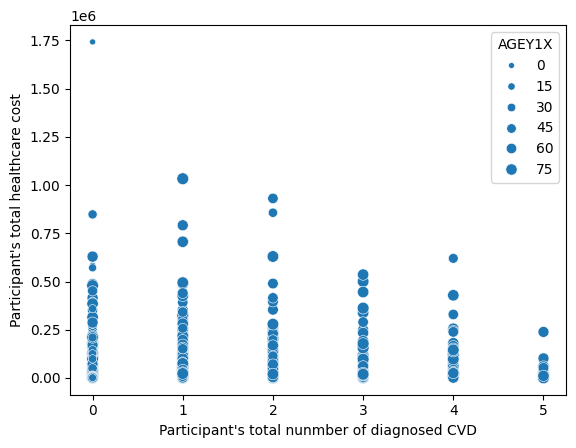

In [11]:
#bubble plot
bp2 = sns.scatterplot(data =data, x = "total_comorbidities", y = "TOTTCHY1", size = "AGEY1X")
bp2.set_xlabel("Participant's total nunmber of diagnosed CVD")
bp2.set_ylabel("Participant's total healthcare cost")

In [ ]:
#Bubble plot is not a good choice to look at correlations across total number of diagnosed CVD, total healthcare costs, and participants' age because there are only 6 levels of the CVD diagnosis numbers and it's hard to tell the complete picture of costs at each level. 

In [18]:
#PCA
#get all the continuous/count data
data_pca = data[['AGEY1X', 'total_comorbidities', 'TOTTCHY1', 'TOTTCHY1_rank']]


In [19]:
data_pca.info()
data_pca_exna = data_pca.dropna() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6741 entries, 0 to 6740
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGEY1X               6616 non-null   float64
 1   total_comorbidities  6741 non-null   int64  
 2   TOTTCHY1             6688 non-null   float64
 3   TOTTCHY1_rank        6688 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 210.8 KB


In [20]:
from sklearn.preprocessing import StandardScaler
# Standardizing the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_pca_exna)

In [21]:
pca = decomposition.PCA(n_components=3)
pca.fit(data_standardized)
pc1, pc2, pc3 = pca.components_
p21 = (pc1, pc2, pc3)
print(p21)

(array([0.51480294, 0.52733091, 0.41021924, 0.53723386]), array([-0.4739451 , -0.40389554,  0.72339224,  0.29824167]), array([ 0.05510841, -0.42161928, -0.50810636,  0.74901814]))


In [22]:
print(pca.explained_variance_ratio_)

[0.51119173 0.23671857 0.13194879]


In [ ]:
#conclusion:
#After standardization, the four variables (age, number of cardiovascular diagnosis, total healthcare costs, and total healthcare cost rank) have similar contibution to the first principle conponent; this also suggests that the total healthcare costs itself provide additional information than just the rank of the healthcare cost. 
#Given the third principle conponent explains ~ 13% of the variance of the data, the principal component analysis does not suggest a way to represent the data using fewer dimensions than usual.

Text(0, 0.5, 'Second Principal Component Score')

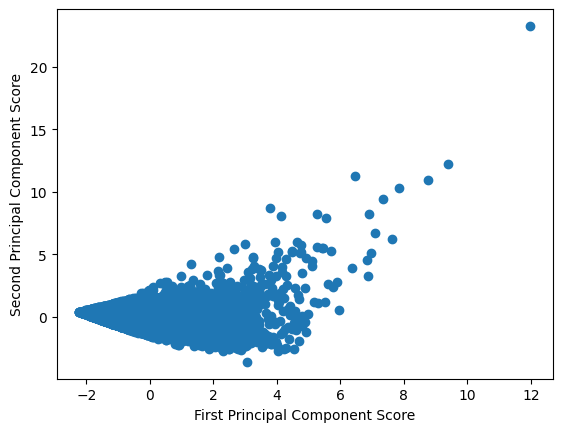

In [23]:
#outliers
first_principal_component_score = data_standardized.dot(pca.components_[0])
second_principal_component_score = data_standardized.dot(pca.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

In [ ]:
#There is 1 outlier with high 1st and 2nd principle conponent. 

In [10]:
data_lr = data[['total_comorbidities', 'AGEY1X', 'PRVEVY1', 'TOTTCHY1', 'TOTTCHY1_rank']]

In [16]:
data_lr.head()

,total_comorbidities,AGEY1X,PRVEVY1,TOTTCHY1,TOTTCHY1_rank
0,1,65.0,1.0,0.0,350.0
1,0,24.0,1.0,1185.0,2315.5
2,1,62.0,1.0,11453.0,5102.0
3,1,67.0,2.0,10284.0,4960.0
4,2,62.0,1.0,4172.0,3827.0


In [11]:
data_lr.info()
data_lr_exna = data_lr.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6741 entries, 0 to 6740
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_comorbidities  6741 non-null   int64  
 1   AGEY1X               6616 non-null   float64
 2   PRVEVY1              6688 non-null   float64
 3   TOTTCHY1             6688 non-null   float64
 4   TOTTCHY1_rank        6688 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 263.4 KB


In [12]:
#linear regression
from sklearn import linear_model
linreg = linear_model.LinearRegression()
linreg.fit(data_lr_exna[['total_comorbidities', 'AGEY1X', 'PRVEVY1']], data_lr_exna['TOTTCHY1'])


LinearRegression()

In [13]:
from sklearn import metrics
preds = linreg.predict(data_lr_exna[['total_comorbidities', 'AGEY1X', 'PRVEVY1']])
metrics.mean_squared_error(preds, data_lr_exna['TOTTCHY1']) # Mean squared error as a metric

3152700840.480905

In [14]:
np.corrcoef(preds, data_lr_exna['TOTTCHY1']) 

array([[1.        , 0.22383079],
       [0.22383079, 1.        ]])

In [15]:
# Print coefficients
print("Intercept:", linreg.intercept_)
print("Coefficients:", linreg.coef_)

Intercept: 1180.2700191200329
Coefficients: [11921.58832761   197.20450551  1300.04803123]


In [17]:
#linear regression
from sklearn import linear_model
linreg = linear_model.LinearRegression()
linreg.fit(data_lr_exna[['total_comorbidities', 'AGEY1X', 'PRVEVY1']], data_lr_exna['TOTTCHY1_rank'])


LinearRegression()

In [19]:
preds = linreg.predict(data_lr_exna[['total_comorbidities', 'AGEY1X', 'PRVEVY1']])
metrics.mean_squared_error(preds, data_lr_exna['TOTTCHY1_rank']) # Mean squared error as a metric

3001596.8066376704

In [20]:
np.corrcoef(preds, data_lr_exna['TOTTCHY1_rank']) 

array([[1.        , 0.43366005],
       [0.43366005, 1.        ]])

In [21]:
# Print coefficients
print("Intercept:", linreg.intercept_)
print("Coefficients:", linreg.coef_)

Intercept: 2641.222670174253
Coefficients: [ 619.04395398   19.53305489 -324.97018261]


In [22]:
data.to_csv("CVD_data2.csv", index=False)

In [ ]:
#There is no variables correlated with the total healthcare costs. However, we hypothesis that the total healthcare costs are positively correlated with the total number of cardiovascular disease diagnosis.
#We used separate linear models to predict 1) total healthcare cost and 2) total healthcare cost rank, with number of CVD diagnosis as the predictor; we also included age and private insurance in the model, as these variables may also have an effect on the outcome besides the main predictor of interest.
#Predicting the rank of total healthcare costs has an improved model performance than predicting the total healthcare costs itself because of the highly skewed distribution of the cost variable; however, the rank model results is harder to interpret. 

#Number of diagnosis of CVD has a strong impact on total healthcare cost. On average, an increase of 1 in the number of CVD diagnosis is related to an increase of $11922 total healthcare costs, and 619 increase in rank of total healthcare costs.
#On average, an increase of 1 year in age is related to $197 increase in total healthcare costs and 20 increase in rank of the cost; not having private health insurance is related to $1300 higher total healthcare costs, but a 325 decrease in rank of the total healthcare costs. 


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

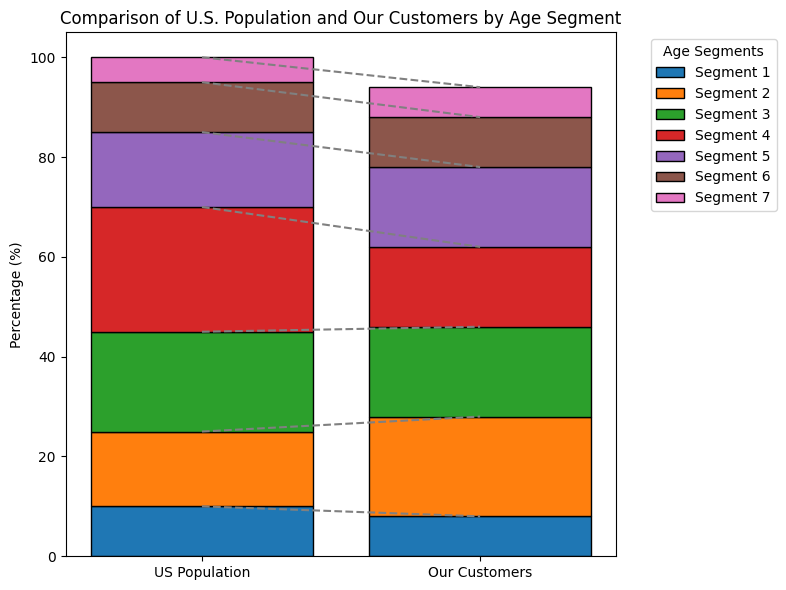

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the segments (e.g., age ranges) and their population and customer percentages
population = ['US Population', 'Our Customers']
segment_values = np.array([
    [10, 8],  # Segment 1
    [15, 20],  # Segment 2
    [20, 18],  # Segment 3
    [25, 16],  # Segment 4
    [15, 16],  # Segment 5
    [10, 10],  # Segment 6
    [5, 6]     # Segment 7
])

# Define colors for each segment
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Stacking logic
bottoms = np.zeros(2)  # Keeps track of cumulative heights for each bar (US Population & Our Customers)

# Loop through each segment and plot bars
for i in range(len(segment_values)):
    ax.bar(population, segment_values[i], bottom=bottoms, label=f'Segment {i+1}', color=colors[i], edgecolor='black')
    bottoms += segment_values[i]  # Update bottom for stacking

# Connect the corresponding segments with lines
us_bar_x = 0  # X position of 'US Population' bar
customer_bar_x = 1  # X position of 'Our Customers' bar
us_heights = np.cumsum(segment_values[:, 0])  # Cumulative heights for US Population
customer_heights = np.cumsum(segment_values[:, 1])  # Cumulative heights for Customers

for i in range(len(segment_values)):
    ax.plot([us_bar_x, customer_bar_x], [us_heights[i], customer_heights[i]], color='gray', linestyle='--')

# Adding labels and title
ax.set_title('Comparison of U.S. Population and Our Customers by Age Segment')
ax.set_ylabel('Percentage (%)')
ax.legend(title="Age Segments", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()